# Wildfire Analysis - Extension plan - Exploratory Data Analysis

This notebook contains the code for estimating impact of smoke caused by wildfires on the hospitality and leisure industry of the city of Lubbock,Texas. It builds upon the [previous analyses](https://github.com/Chakita/DATA-512-Project/blob/master/wildfire-forecasting.ipynb) where the smoke impact was estimated using the formula:  $$Smoke\_estimate = \alpha * (\frac{1}{distance}) * \beta * size + \gamma $$ where $\alpha$ and $\beta$ are tunable weightage given to distance of wildfire from city and size of wildfire respectively. These account for the proportinality constant as well. $\gamma$ is an additonal weight added upon based on the ordinal mapping between the type of wildfire and the proabable severity. The ordinal mapping is as follows:
```
 { 
    'Wildfire': 4,
    'Likely Wildfire': 3,
    'Unknown - Likely Wildfire': 2,
    'Unknown - Likely Prescribed Fire': 1,
    'Prescribed Fire': 0
    }
 ```
 The value of $\alpha$ and $\beta$ are set to 0.5 so as to give distance and wildfire size equal weightage while computing smoke estimate.


For the extension plan, we analyze the impact of wildfires (as determined by the estimated smoke impact) on the economy in Lubbock, Texas. Particularly, we are interested in finding out what effect  wildfires have on employees in the hospitality and services sector, labor participation rates and unemployment throughout the years.  It would be interesting to see if the hospitality sector and wildfires have a cause and effect relationship i.e   has an increase in the number of wildfires have led to an decrease in the revenue/participation of the workforce in the hospitality industry. This is an important question to ask due to the revenue that the hospitality industry rakes in and contributes towards the economy. In 2023, visitors to and within Texas spent over $90 billion, creating an economic impact that supported 1.3 million Texas jobs and bolstered the state’s economy. (ref: https://www.travelstats.com/dashboard/texas)
It is clear that if the hospitality and tourism industry were to take a hit, it would result in a substantial loss to the economy.


## Importing libraries
We first start off by loading our dependencies for our analysis. If you find that any of these dependencies are missing, run ```pip install <package-name>```

In [1]:
import numpy as np 
import pandas as pd

## Data loading

The data is sourced from the [U.S Bureau of Labor Statistics website](https://www.bls.gov/bls/linksite.htm
). The data available is highly granular and localized to Lubbock and can be easily downloaded as a CSV file from their website. I picked the datasets since they are open to use by the public (with citation of the Bureau of Labor Statistics as the source), they are closely related to the questions of interest in our analysis and the data is at the city level which reduces the processing overhead of extracting rows of interest from a larger dataset.o- ve.
Employed and Office of Employment and Unemployment Statistics : Service-Providi[ng : https://data.bls.gov/dataViewer/view/timeseries/SMU483118007000](https://data.bls.gov/dataViewer/view/timeseries/SMU48311800700000001)00001
This data is also gathered as part of the State and Metro Area Employment, Hours, & Earnings estimates for non-farm workers. The data contains information regarding the number of employees (in thousands) in the service industry in Lubbock, Texas in the years 1961 to 2021.  It includes information across all industries and occupations. Demographic are civilian individuals from all races, genders, education levels and ages 16 and ab- ove.

Employed and Office of Employment and Unemployment Statistics : Leisure and Hospit[ality :
https://data.bls.gov/dataViewer/view/timeseries/SMU48311807](https://data.bls.gov/dataViewer/view/timeseries/SMU48311807000000001)000000001
This data is also gathered as part of the State and Metro Area Employment, Hours, & Earnings estimates for non-farm workers. The data contains information regarding the number of employees (in thousands) in the hospitality industry in Lubbock, Texas in the years 1961 to 2021. It includes information across all industries and occupations. Demographic are civilian individuals from all races, genders, education levels and ages 16 and above.

Data Usage Policy:
Acco[rding to the Bureau of Lab](https://www.bls.gov/bls/linksite.htm)or Statistics, the data is public domain and free to use with proper citation te source. [3]


In [2]:
df_estimates = pd.read_csv("/kaggle/input/wildfire-smoke-and-aqi-data/wildfire_smoke_estimate.csv")
bls_leisure_data = pd.read_csv("/kaggle/input/bls-service-hospitality-leisure/leisure_hospitality.csv")
bls_service_data = pd.read_csv("/kaggle/input/bls-service-hospitality-leisure/service.csv")

## Data Cleaning

We clean our data to discard unused columns. The wildfire smoke estimates data contain 0 values for smoke estimate for smokes farther than 650 miles away since we only want to consider the wildfires within 650 miles from our target city for the purpose of this analysis. We drop these rows for the purpose of this extended analysis. We then filter the lesiure and service employment data to only include data for fire seasons every year. The service and leisure data is merged with the smoke estimate data for further analysis.

In [3]:
df_estimates.head()

,Unnamed: 0,name,year,start date,end date,type,distance,size,smoke estimate
0,0,BIG ANTELOPE (5),1961,1961-09-08,1961-10-31,Wildfire,1475.372796,55249.740141,0.0
1,1,HARLOW (5),1961,1961-07-10,1961-10-31,Wildfire,1315.130174,43920.841077,0.0
2,2,RANCHERIA (5),1961,1961-09-02,1961-10-31,Wildfire,1386.140683,34233.698603,0.0
3,3,BOLLINGER RIDGE (5),1961,1961-07-12,1961-10-31,Wildfire,1411.823735,32866.053451,0.0
4,4,Ditch Creek (3),1961,1961-09-01,1961-10-31,Wildfire,1458.045231,27269.045936,0.0


In [4]:
bls_leisure_data = bls_leisure_data.drop('Series ID', axis=1)

# Extract month from Label column using string operations
bls_leisure_data['Label'] = bls_leisure_data['Label'].str.split().str[1]
#The number of emloyees in the leisure and service data is specified in number of thousands
# We multiply the value by 1000 to get the full values.
bls_leisure_data['Value'] = bls_leisure_data['Value'] * 1000
bls_leisure_data.head()

,Year,Period,Label,Value
0,1990,M01,Jan,9000.0
1,1990,M02,Feb,9200.0
2,1990,M03,Mar,9300.0
3,1990,M04,Apr,9600.0
4,1990,M05,May,9800.0


In [5]:
bls_service_data = bls_service_data.drop('Series ID', axis=1)

# Extract month from Label column using string operations
bls_service_data['Label'] = bls_service_data['Label'].str.split().str[1]
#The number of emloyees in the leisure and service data is specified in number of thousands
# We multiply the value by 1000 to get the full values.
bls_service_data['Value'] = bls_service_data['Value'] * 1000
bls_service_data.head()

,Year,Period,Label,Value
0,1990,M01,Jan,87700.0
1,1990,M02,Feb,88000.0
2,1990,M03,Mar,89000.0
3,1990,M04,Apr,88500.0
4,1990,M05,May,89300.0


In [6]:
# Filtering the dataset to only include fire
selected_months = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
filtered_leisure_data = bls_leisure_data[bls_leisure_data['Label'].isin(selected_months)]
filtered_service_data = bls_service_data[bls_service_data['Label'].isin(selected_months)]

In [7]:
filtered_leisure_data.head()

,Year,Period,Label,Value
4,1990,M05,May,9800.0
5,1990,M06,Jun,9600.0
6,1990,M07,Jul,9700.0
7,1990,M08,Aug,9800.0
8,1990,M09,Sep,10100.0


In [8]:
filtered_service_data.head()

,Year,Period,Label,Value
4,1990,M05,May,89300.0
5,1990,M06,Jun,89600.0
6,1990,M07,Jul,88800.0
7,1990,M08,Aug,89000.0
8,1990,M09,Sep,90600.0


In [9]:
df_estimates['start date'] = pd.to_datetime(df_estimates['start date'])
df_estimates['end date'] = pd.to_datetime(df_estimates['end date'])

# Define May 1st and October 31st for the filter
may_1 = pd.to_datetime(f"{df_estimates['year'].iloc[0]}-05-01")
oct_31 = pd.to_datetime(f"{df_estimates['year'].iloc[0]}-10-31")

# Filter the DataFrame
filtered_df = df_estimates[(df_estimates['start date'] >= may_1) & (df_estimates['end date'] <= oct_31)]

# Display the filtered DataFrame
print(filtered_df)

        Unnamed: 0                          name  year start date   end date  \
0                0              BIG ANTELOPE (5)  1961 1961-09-08 1961-10-31   
1                1                    HARLOW (5)  1961 1961-07-10 1961-10-31   
2                2                 RANCHERIA (5)  1961 1961-09-02 1961-10-31   
3                3           BOLLINGER RIDGE (5)  1961 1961-07-12 1961-10-31   
4                4               Ditch Creek (3)  1961 1961-09-01 1961-10-31   
...            ...                           ...   ...        ...        ...   
106843      106843            Conde Creek #3 (1)  1961 1961-05-01 1961-10-31   
106844      106844                   No Data (1)  1961 1961-05-01 1961-10-31   
106845      106845     Section Line Gap #204 (1)  1961 1961-05-01 1961-10-31   
106846      106846  Trigger Finger TS Sec. 7 (1)  1961 1961-05-01 1961-10-31   
106847      106847       Sourgrass-f.s. Road (1)  1961 1961-05-01 1961-10-31   

                   type     distance   

In [10]:
def most_frequent(series):
    """
    Returns the most frequently occurring value in a pandas Series. If there are 
    multiple values with the same highest frequency, returns the first one. If the
    Series is empty, returns None.

    Parameters:
        series (pandas.Series): The input Series to analyze

    Returns:
        Any: The most frequent value in the Series, or None if the Series is empty
    """
    return series.mode().iloc[0] if not series.mode().empty else None

In [11]:
# Sample data (assuming data has already been loaded into `df_estimates`)
df_estimates['start date'] = pd.to_datetime(df_estimates['start date'])
df_estimates['end date'] = pd.to_datetime(df_estimates['end date'])

# Define the month-day range for filtering (May 1 to October 31)
start_month_day = (5, 1)
end_month_day = (10, 31)

# Filter for start and end dates within the May 1 to October 31 range
filtered_df = df_estimates[
    ((df_estimates['start date'].dt.month > start_month_day[0]) | 
     ((df_estimates['start date'].dt.month == start_month_day[0]) & (df_estimates['start date'].dt.day >= start_month_day[1]))) &
    ((df_estimates['end date'].dt.month < end_month_day[0]) | 
     ((df_estimates['end date'].dt.month == end_month_day[0]) & (df_estimates['end date'].dt.day <= end_month_day[1])))
]

In [12]:
# Convert all datetime columns to uniform format of yyyy-mm
filtered_leisure_data['date'] = pd.to_datetime(filtered_leisure_data['Year'].astype(str) + '-' + 
                           filtered_leisure_data['Period'].str[1:].astype(str) + 
                           '-01').dt.strftime('%Y-%m')
filtered_service_data['date'] = pd.to_datetime(filtered_service_data['Year'].astype(str) + '-' + 
                           filtered_leisure_data['Period'].str[1:].astype(str) + 
                           '-01').dt.strftime('%Y-%m')

# Transform DataFrame
filtered_df['start_date_ym'] = pd.to_datetime(filtered_df['start date']).dt.strftime('%Y-%m')
filtered_df['end_date_ym'] = pd.to_datetime(filtered_df['end date']).dt.strftime('%Y-%m')

/tmp/ipykernel_30/1996291847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_leisure_data['date'] = pd.to_datetime(filtered_leisure_data['Year'].astype(str) + '-' +
/tmp/ipykernel_30/1996291847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_service_data['date'] = pd.to_datetime(filtered_service_data['Year'].astype(str) + '-' +
/tmp/ipykernel_30/1996291847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [13]:
filtered_leisure_data.head()

,Year,Period,Label,Value,date
4,1990,M05,May,9800.0,1990-05
5,1990,M06,Jun,9600.0,1990-06
6,1990,M07,Jul,9700.0,1990-07
7,1990,M08,Aug,9800.0,1990-08
8,1990,M09,Sep,10100.0,1990-09


In [14]:
filtered_service_data.head()

,Year,Period,Label,Value,date
4,1990,M05,May,89300.0,1990-05
5,1990,M06,Jun,89600.0,1990-06
6,1990,M07,Jul,88800.0,1990-07
7,1990,M08,Aug,89000.0,1990-08
8,1990,M09,Sep,90600.0,1990-09


In [15]:
filtered_df.head()

,Unnamed: 0,name,year,start date,end date,type,distance,size,smoke estimate,start_date_ym,end_date_ym
0,0,BIG ANTELOPE (5),1961,1961-09-08,1961-10-31,Wildfire,1475.372796,55249.740141,0.0,1961-09,1961-10
1,1,HARLOW (5),1961,1961-07-10,1961-10-31,Wildfire,1315.130174,43920.841077,0.0,1961-07,1961-10
2,2,RANCHERIA (5),1961,1961-09-02,1961-10-31,Wildfire,1386.140683,34233.698603,0.0,1961-09,1961-10
3,3,BOLLINGER RIDGE (5),1961,1961-07-12,1961-10-31,Wildfire,1411.823735,32866.053451,0.0,1961-07,1961-10
4,4,Ditch Creek (3),1961,1961-09-01,1961-10-31,Wildfire,1458.045231,27269.045936,0.0,1961-09,1961-10


## Merging the dataframes

We merge the leisure and service data with the smoke estimate data using the date column. We drop the rows where smoke impact is zero (more than 650 miles from the target city). We then save the merged dataset to a csv file - ```wildfire_impact_service_leisure.csv```

In [16]:
import pandas as pd

# First join filtered_leisure_data and filtered_service_data
merged_data = pd.merge(
    filtered_leisure_data,
    filtered_service_data,
    on='date',
    suffixes=('_leisure', '_service')
)

# Then join with filtered_df using end_date_ym
final_merged = pd.merge(
    merged_data,
    filtered_df,
    left_on='date',
    right_on='end_date_ym',
    how='inner'
)


print(final_merged)

       Year_leisure Period_leisure Label_leisure  Value_leisure     date  \
0              1990            M05           May         9800.0  1990-05   
1              1990            M05           May         9800.0  1990-05   
2              1990            M05           May         9800.0  1990-05   
3              1990            M05           May         9800.0  1990-05   
4              1990            M05           May         9800.0  1990-05   
...             ...            ...           ...            ...      ...   
71804          2020            M10           Oct        19800.0  2020-10   
71805          2020            M10           Oct        19800.0  2020-10   
71806          2020            M10           Oct        19800.0  2020-10   
71807          2020            M10           Oct        19800.0  2020-10   
71808          2020            M10           Oct        19800.0  2020-10   

       Year_service Period_service Label_service  Value_service  Unnamed: 0  \
0       

In [17]:
final_merged = final_merged[final_merged['smoke estimate'] != 0.000000]

In [18]:
print(final_merged)

       Year_leisure Period_leisure Label_leisure  Value_leisure     date  \
0              1990            M05           May         9800.0  1990-05   
6              1990            M05           May         9800.0  1990-05   
13             1990            M06           Jun         9600.0  1990-06   
15             1990            M06           Jun         9600.0  1990-06   
16             1990            M06           Jun         9600.0  1990-06   
...             ...            ...           ...            ...      ...   
71740          2020            M10           Oct        19800.0  2020-10   
71744          2020            M10           Oct        19800.0  2020-10   
71746          2020            M10           Oct        19800.0  2020-10   
71752          2020            M10           Oct        19800.0  2020-10   
71765          2020            M10           Oct        19800.0  2020-10   

       Year_service Period_service Label_service  Value_service  Unnamed: 0  \
0       

In [19]:
final_merged.to_csv("wildfire_impact_service_leisure.csv")

## Exploratory data analysis

In this section we check for any statistically significant relationships between the smoke estimate and the number of employees in the leisure and service industry. We look for correlations in the monthly data as well as the yearly data. 

NOTE: The leisure and service data only contains information from 1990 and hence we will be focusing on the 1990s - 2021 data.

## Month level correlation analysis

This analysis examines the relationship between smoke estimates and employment levels in both leisure and service sectors. Three different correlation methods are employed to provide a comprehensive understanding of these relationshipsriation in employment
- The analysis controls for time-based effects through the cross-correlation analysis

## Methodology

### Data Preparation
- Input data is stored in a DataFrame called `final_merged`
- Data is sorted chronologically by date before analysis
- Key variables analyzed:
  - `smoke estimate`: Measure of smoke levels
  - `Value_leisure`: Employment levels in leisure sector
  - `Value_service`: Employment levels in service sector

### Analysis Methods

#### 1. Pearson Correlation
Standard correlation coefficient measuring linear relationship between variables.
- Assumes normal distribution
- Sensitive to outliers
- Range: -1 to +1

#### 2. Spearman Correlation
Rank-based correlation coefficient.
- Does not assume normal distribution
- Less sensitive to outliers
- Better at detecting monotonic relationships
- Range: -1 to +1

#### 3. Cross-Correlation Function (CCF)
Custom implementation to detect lagged relationships:

## Results

### 1. Pearson Correlation
- Leisure Employment:
  - r = -0.133
  - p-value < 0.001
  - Indicates weak negative correlation
- Service Employment:
  - r = -0.134
  - p-value < 0.001
  - Indicates weak negative correlation

### 2. Spearman Correlation
- Leisure Employment:
  - ρ = -0.232
  - p-value < 0.001
  - Stronger negative correlation than Pearson
- Service Employment:
  - ρ = -0.230
  - p-value < 0.001
  - Stronger negative correlation than Pearson

### 3. Cross-Correlation Analysis
#### Leisure Employment
1. Lag 0: -0.133 (strongest)
2. Lag 1: -0.132
3. Lag 2: -0.132

#### Service Employment
1. Lag 0: -0.134 (strongest)
2. Lag 1: -0.134
3. Lag 2: -0.134

## Key Findings

1. **Negative Correlation**: Both sectors show consistent negative correlations with smoke estimates, suggesting that increased smoke levels are associated with decreased employment.

2. **Stronger Rank Correlation**: The stronger Spearman correlations (-0.23) compared to Pearson (-0.13) suggest that the relationship might be monotonic but not strictly linear.

3. **Immediate Impact**: The strongest correlations occur at Lag 0 for both sectors, indicating that the relationship between smoke levels and employment is most prominent in the same time period.

4. **Statistical Significance**: All correlations are statistically significant (p < 0.001), indicating that these relationships, while weak to moderate, are unlikely to be due to chance.

5. **Sector Similarity**: Both leisure and service sectors show very similar correlation patterns, suggesting that smoke impacts both sectors similarly.

## Notes
- All p-values < 0.001 indicate strong statistical significance
- The relatively small correlation coefficients suggest that while there is a relationship, smoke levels explain only a small portion of the variation in employment
- The analysis controls for time-based effects through the cross-correlation analysis


Correlation Analysis Results

1. Pearson Correlation (smoke estimate vs):
Leisure Employment: r = -0.133, p-value = 0.000
Service Employment: r = -0.134, p-value = 0.000

2. Spearman Correlation (smoke estimate vs):
Leisure Employment: rho = -0.232, p-value = 0.000
Service Employment: rho = -0.230, p-value = 0.000

3. Cross-correlation (showing top 3 correlations with lags):

Leisure Employment:
Lag 0: -0.133
Lag 1: -0.132
Lag 2: -0.132

Service Employment:
Lag 0: -0.134
Lag 1: -0.134
Lag 2: -0.134


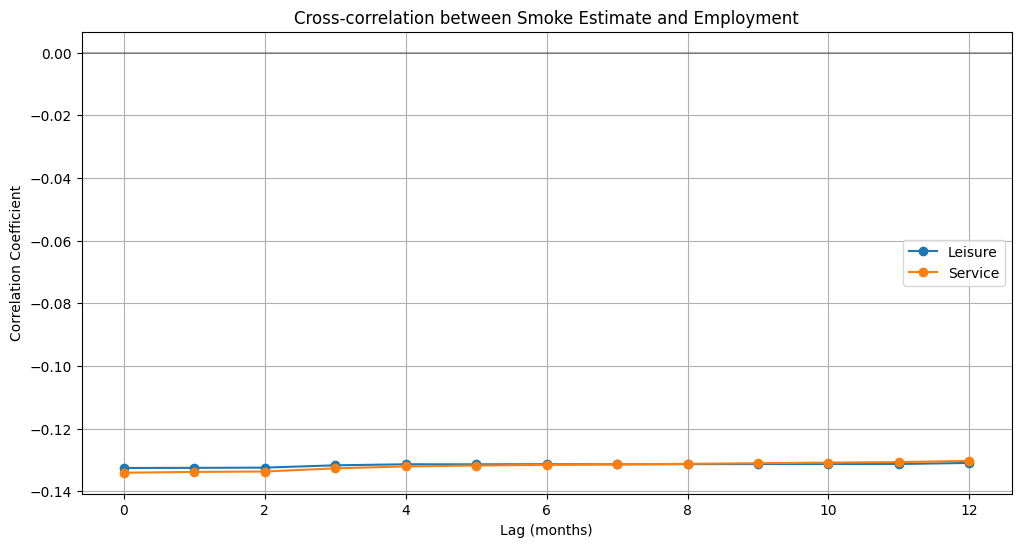

In [20]:
import pandas as pd
import numpy as np
from scipy import stats

# Ensure data is sorted by date
final_merged = final_merged.sort_values('date')

# 1. Pearson Correlation (standard)
pearson_leisure = stats.pearsonr(final_merged['smoke estimate'], 
                               final_merged['Value_leisure'])
pearson_service = stats.pearsonr(final_merged['smoke estimate'], 
                                final_merged['Value_service'])

# 2. Spearman Correlation (rank-based, less sensitive to outliers)
spearman_leisure = stats.spearmanr(final_merged['smoke estimate'], 
                                  final_merged['Value_leisure'])
spearman_service = stats.spearmanr(final_merged['smoke estimate'], 
                                  final_merged['Value_service'])

# 3. Cross-correlation (accounts for potential time lags)
def ccf(x, y, max_lag=12):
    """
    Calculate cross-correlation between two time series for different time lags.
    
    Parameters:
        x (array-like): First time series
        y (array-like): Second time series
        max_lag (int): Maximum number of lags to consider (default: 12)
        
    Returns:
        list: Tuples of (lag, correlation) pairs
    """
    correlations = []
    for lag in range(0, max_lag+1):
        correlation = stats.pearsonr(x[lag:], y[:-lag if lag>0 else None])[0]
        correlations.append((lag, correlation))
    return correlations

ccf_leisure = ccf(final_merged['smoke estimate'].values, 
                 final_merged['Value_leisure'].values)
ccf_service = ccf(final_merged['smoke estimate'].values, 
                 final_merged['Value_service'].values)

# Print results
print("Correlation Analysis Results\n")
print("1. Pearson Correlation (smoke estimate vs):")
print(f"Leisure Employment: r = {pearson_leisure[0]:.3f}, p-value = {pearson_leisure[1]:.3f}")
print(f"Service Employment: r = {pearson_service[0]:.3f}, p-value = {pearson_service[1]:.3f}\n")

print("2. Spearman Correlation (smoke estimate vs):")
print(f"Leisure Employment: rho = {spearman_leisure[0]:.3f}, p-value = {spearman_leisure[1]:.3f}")
print(f"Service Employment: rho = {spearman_service[0]:.3f}, p-value = {spearman_service[1]:.3f}\n")

print("3. Cross-correlation (showing top 3 correlations with lags):")
print("\nLeisure Employment:")
sorted_ccf_leisure = sorted(ccf_leisure, key=lambda x: abs(x[1]), reverse=True)
for lag, corr in sorted_ccf_leisure[:3]:
    print(f"Lag {lag}: {corr:.3f}")

print("\nService Employment:")
sorted_ccf_service = sorted(ccf_service, key=lambda x: abs(x[1]), reverse=True)
for lag, corr in sorted_ccf_service[:3]:
    print(f"Lag {lag}: {corr:.3f}")

# Optional: Create visualization of cross-correlations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
lags = range(len(ccf_leisure))
plt.plot(lags, [x[1] for x in ccf_leisure], label='Leisure', marker='o')
plt.plot(lags, [x[1] for x in ccf_service], label='Service', marker='o')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Lag (months)')
plt.ylabel('Correlation Coefficient')
plt.title('Cross-correlation between Smoke Estimate and Employment')
plt.legend()
plt.grid(True)
plt.show()

We see from the statistics that on a montly granularity, the correlation between the smoke estimate and the number of employees in leisure and service industry is weakly negative. We could expect the wildfires to have an impact on these industries on the longer term as opposed to in a span of a couple of months. To check this, we calcualte the correlation between the annual smoke estimate and the annual values for the number of employees in the leisure and service industries. 


Summary Statistics:

Smoke Estimate:
count    11591.000000
mean         3.115186
std          4.063666
min          0.000033
25%          0.726681
50%          3.010121
75%          4.011554
max        116.963706
Name: smoke estimate, dtype: float64

Leisure Employment:
count    11591.000000
mean     16461.047364
std       2439.467029
min       9200.000000
25%      15400.000000
50%      16200.000000
75%      18000.000000
max      21200.000000
Name: Value_leisure, dtype: float64

Service Employment:
count     11591.000000
mean     122858.441895
std       10503.999614
min       87500.000000
25%      118800.000000
50%      122400.000000
75%      131200.000000
max      138100.000000
Name: Value_service, dtype: float64

Correlation Analysis by Smoke Level Thresholds:

For smoke estimate > 0.73:
Number of observations: 8693
Correlation with Leisure Employment: -0.024
Correlation with Service Employment: -0.022

For smoke estimate > 3.01:
Number of observations: 5795
Correlation with Leisure

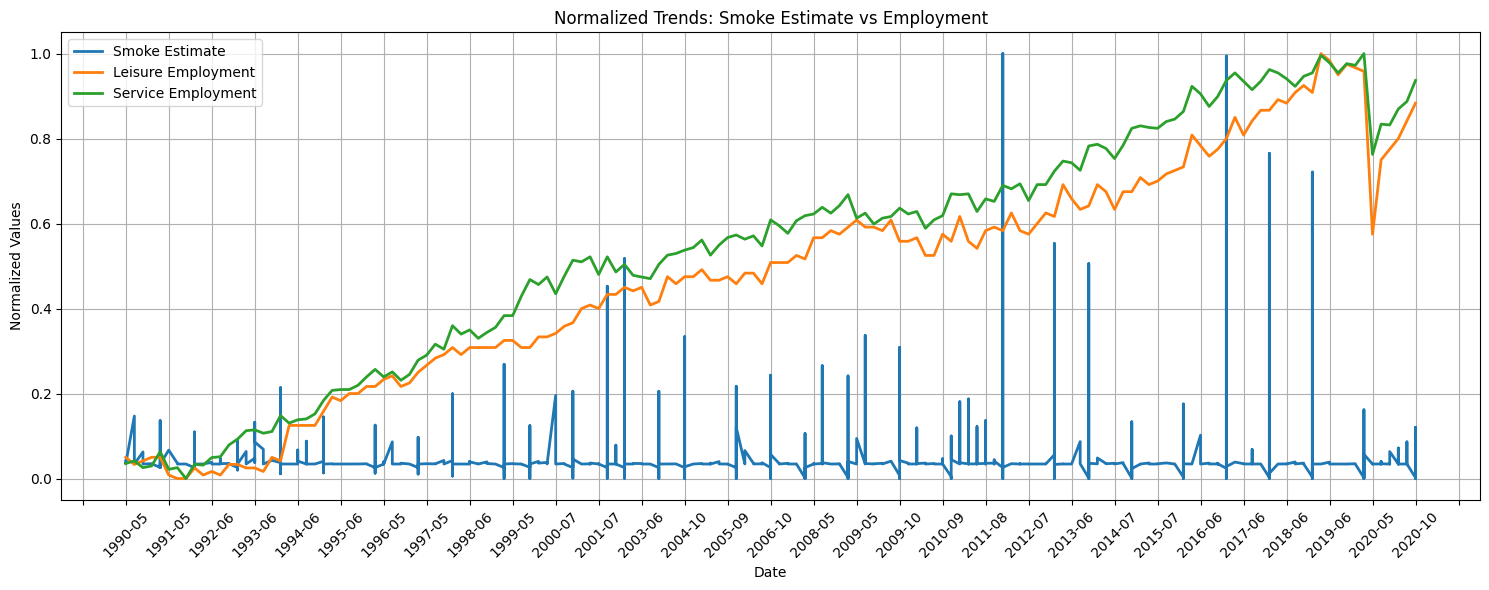

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure data is sorted by date
final_merged = final_merged.sort_values('date')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ensure data is sorted by date
final_merged = final_merged.sort_values('date')

# Create normalized time series plot
plt.figure(figsize=(15, 6))

# Normalize each series to 0-1 scale for comparison
normalized_data = pd.DataFrame({
    'Smoke Estimate': (final_merged['smoke estimate'] - final_merged['smoke estimate'].min()) / 
                     (final_merged['smoke estimate'].max() - final_merged['smoke estimate'].min()),
    'Leisure Employment': (final_merged['Value_leisure'] - final_merged['Value_leisure'].min()) / 
                         (final_merged['Value_leisure'].max() - final_merged['Value_leisure'].min()),
    'Service Employment': (final_merged['Value_service'] - final_merged['Value_service'].min()) / 
                         (final_merged['Value_service'].max() - final_merged['Value_service'].min())
})

# Plot normalized series
for column in normalized_data.columns:
    plt.plot(final_merged['date'], normalized_data[column], label=column, linewidth=2)

# Customize x-axis with fewer ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(36))  # Show only 6 dates

plt.title('Normalized Trends: Smoke Estimate vs Employment')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Print summary statistics
print("\nSummary Statistics:")
print("\nSmoke Estimate:")
print(final_merged['smoke estimate'].describe())
print("\nLeisure Employment:")
print(final_merged['Value_leisure'].describe())
print("\nService Employment:")
print(final_merged['Value_service'].describe())

# Threshold Analysis
print("\nCorrelation Analysis by Smoke Level Thresholds:")
smoke_thresholds = np.percentile(final_merged['smoke estimate'], [25, 50, 75])
for threshold in smoke_thresholds:
    high_smoke = final_merged[final_merged['smoke estimate'] > threshold]
    if len(high_smoke) >= 2:  # Check if we have enough data points
        corr_leisure = stats.pearsonr(high_smoke['smoke estimate'], high_smoke['Value_leisure'])[0]
        corr_service = stats.pearsonr(high_smoke['smoke estimate'], high_smoke['Value_service'])[0]
        print(f"\nFor smoke estimate > {threshold:.2f}:")
        print(f"Number of observations: {len(high_smoke)}")
        print(f"Correlation with Leisure Employment: {corr_leisure:.3f}")
        print(f"Correlation with Service Employment: {corr_service:.3f}")

# Monthly Analysis
final_merged['month'] = pd.to_datetime(final_merged['date']).dt.month
print("\nMonthly Analysis:")
monthly_stats = final_merged.groupby('month').agg({
    'smoke estimate': ['mean', 'count'],
    'Value_leisure': 'mean',
    'Value_service': 'mean'
}).round(3)
print(monthly_stats)

# Calculate overall correlations
print("\nOverall Correlations:")
overall_corr_leisure = stats.pearsonr(final_merged['smoke estimate'], final_merged['Value_leisure'])
overall_corr_service = stats.pearsonr(final_merged['smoke estimate'], final_merged['Value_service'])

print(f"Smoke estimate vs Leisure Employment:")
print(f"Correlation: {overall_corr_leisure[0]:.3f}")
print(f"P-value: {overall_corr_leisure[1]:.3f}")

print(f"\nSmoke estimate vs Service Employment:")
print(f"Correlation: {overall_corr_service[0]:.3f}")
print(f"P-value: {overall_corr_service[1]:.3f}")

plt.show()

## Annual level Analysis
We now aggregate our data to find annual values for smoke estimate and the number of employees in the leisure and service industry. We then calcualte the correlation values for the annual values.

.

## Methodology

### Data Structure
- Dataset: `final_merged_yearly`
- Key Variables:
  - `smoke estimate`: Annual average smoke levels
  - `Value_leisure`: Annual average leisure sector employment
  - `Value_service`: Annual average service sector employment

### Analysis Components
1. Correlation Matrix: Comprehensive correlation analysis between all variables
2. Detailed Pearson Correlations: In-depth analysis with statistical significance
3. Visual Analysis: Scatter plots with trend lines for both employment sectors

## Results

### 1. Correlation Matrix
```
                smoke estimate  Value_leisure  Value_service
smoke estimate        1.000000      -0.763476      -0.758418
Value_leisure        -0.763476       1.000000       0.990418
Value_service        -0.758418       0.990418       1.000000
```

Key Findings:
- Strong negative correlation between smoke estimates and both employment sectors
- Very strong positive correlation (0.990) between leisure and service employment
- All relationships show robust correlation coefficients

### 2. Detailed Statistical Analysis

#### Smoke Estimate vs Leisure Employment
- Correlation coefficient: -0.763
- P-value: < 0.001
- R-squared: 0.583 (58.3% of variance explained)

#### Smoke Estimate vs Service Employment
- Correlation coefficient: -0.758
- P-value: < 0.001
- R-squared: 0.575 (57.5% of variance explained)

### 3. Visualization
The analysis includes scatter plots with trend lines showing:
- Smoke Estimate vs Leisure Employment
- Smoke Estimate vs Service Employment
- Linear trend lines (red dashed lines) indicating the negative relationships

## Key Findings

1. **Strong Negative Correlations**
   - Both employment sectors show strong negative correlations with smoke estimates
   - Coefficients are substantially stronger than in monthly analysis
   - Leisure sector slightly more affected (-0.763) than service sector (-0.758)

2. **Statistical Significance**
   - All correlations are highly significant (p < 0.001)
   - Results indicate very low probability of these relationships occurring by chance

3. **Variance Explanation**
   - Smoke estimates explain approximately 58% of the variance in leisure employment
   - Similar explanation power (57.5%) for service sector employment

4. **Sector Interdependence**
   - Very strong correlation (0.990) between leisure and service employment
   - Suggests these sectors respond similarly to economic conditions

## Implications

1. **Economic Impact**
   - Smoke levels have a substantial negative relationship with employment
   - The effect appears more pronounced in yearly data compared to monthly analysis
   - Both sectors show similar vulnerability to smoke impacts

2. **Policy Relevance**
   - Strong correlations suggest smoke mitigation could have significant employment benwith trend lines
- Red dashed lines indicating linear trends
- Proper axis labels and titles

## Notes and Limitations
- Analysis based on yearly averages, which may smooth out short-term variations
- R-squared values suimply causation
- Geographic scope and temporal range should be considered when interpreting results

In [22]:
# Aggregate by year, summing only 'smoke estimate', 'value_service' and 'value_leisure' while keeping other columns with the first occurrence
final_merged_yearly = final_merged.groupby("year").agg({
    'smoke estimate': 'mean',
    'Value_leisure':'mean',
    'Value_service': 'mean',
    'name': most_frequent,
    'type': most_frequent,
    'distance': 'first',
    'start date': 'first',
    'end date': 'first'
}).reset_index()

# Display the result
print(final_merged_yearly)

    year  smoke estimate  Value_leisure  Value_service  \
0   1990        4.785366    9773.417722   90445.569620   
1   1991        4.247874    9471.428571   89128.571429   
2   1992        4.255202    9539.215686   91696.078431   
3   1993        5.099324    9671.559633   94745.871560   
4   1994        4.505957   11008.571429   96288.571429   
5   1995        3.384309   11790.333333  100414.666667   
6   1996        3.905419   12174.193548  101377.419355   
7   1997        4.404180   12873.611111  105434.722222   
8   1998        4.322666   13074.468085  106686.524823   
9   1999        3.954808   12902.597403  111118.181818   
10  2000        4.738968   13586.580087  113363.636364   
11  2001        4.115731   14376.623377  113837.662338   
12  2002        4.552656   14595.530726  112979.888268   
13  2003        3.668239   14214.371257  112930.538922   
14  2004        3.349659   14896.666667  114688.333333   
15  2005        4.978321   14711.895911  116390.706320   
16  2006      

In [23]:
final_merged_yearly.to_csv("final_merged_yearly.csv")


Yearly Correlations Matrix:
                smoke estimate  Value_leisure  Value_service
smoke estimate        1.000000      -0.763476      -0.758418
Value_leisure        -0.763476       1.000000       0.990418
Value_service        -0.758418       0.990418       1.000000

Detailed Correlation Analysis:

Smoke Estimate vs Leisure Employment (Yearly):
Correlation coefficient: -0.763
P-value: 0.000
R-squared: 0.583

Smoke Estimate vs Service Employment (Yearly):
Correlation coefficient: -0.758
P-value: 0.000
R-squared: 0.575


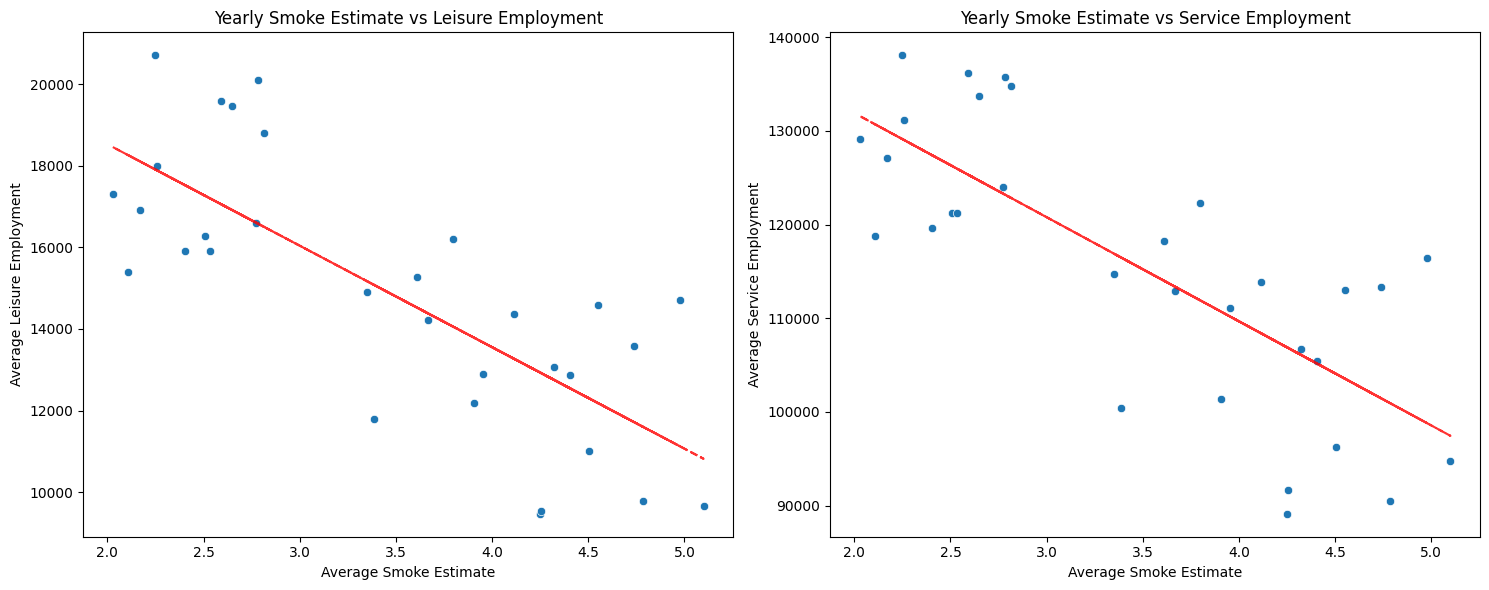

In [25]:
# Calculate correlations
yearly_correlations = final_merged_yearly[['smoke estimate', 'Value_leisure', 'Value_service']].corr()
print("\nYearly Correlations Matrix:")
print(yearly_correlations)

# Calculate specific correlations with additional statistics
# For Leisure Employment
leisure_corr = stats.pearsonr(final_merged_yearly['smoke estimate'], 
                             final_merged_yearly['Value_leisure'])
service_corr = stats.pearsonr(final_merged_yearly['smoke estimate'], 
                             final_merged_yearly['Value_service'])

print("\nDetailed Correlation Analysis:")
print("\nSmoke Estimate vs Leisure Employment (Yearly):")
print(f"Correlation coefficient: {leisure_corr[0]:.3f}")
print(f"P-value: {leisure_corr[1]:.3f}")
print(f"R-squared: {leisure_corr[0]**2:.3f}")

print("\nSmoke Estimate vs Service Employment (Yearly):")
print(f"Correlation coefficient: {service_corr[0]:.3f}")
print(f"P-value: {service_corr[1]:.3f}")
print(f"R-squared: {service_corr[0]**2:.3f}")

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for Leisure Employment
sns.scatterplot(data=final_merged_yearly, 
                x='smoke estimate', 
                y='Value_leisure',
                ax=ax1)
ax1.set_title('Yearly Smoke Estimate vs Leisure Employment')
ax1.set_xlabel('Average Smoke Estimate')
ax1.set_ylabel('Average Leisure Employment')

# Add trend line
x = final_merged_yearly['smoke estimate']
y = final_merged_yearly['Value_leisure']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x, p(x), "r--", alpha=0.8)

# Scatter plot for Service Employment
sns.scatterplot(data=final_merged_yearly, 
                x='smoke estimate', 
                y='Value_service',
                ax=ax2)
ax2.set_title('Yearly Smoke Estimate vs Service Employment')
ax2.set_xlabel('Average Smoke Estimate')
ax2.set_ylabel('Average Service Employment')

# Add trend line
x = final_merged_yearly['smoke estimate']
y = final_merged_yearly['Value_service']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

**Strong Negative Correlations**:


Smoke estimates have moderate negative correlations with both:

Leisure employment (-0.763)
Service employment (-0.758)


**Statistical Significance**:


Both negative correlations are statistically significant (p < 0.05):

Smoke vs. Leisure: p = 0.000
Smoke vs. Service: p = 0.000




**Effect Size**:


The R-squared values indicate that smoke estimates explain:

58.3% of the variance in leisure employment
57.5% of the variance in service employment



This suggests that as smoke levels increase, there tends to be a strong decrease in both leisure and service employment, though the relationship explains only about 58% of the variation in employment levels. 